In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(10,6)})
import numpy as np

In [ ]:
df = pd.read_csv('Heart Diseases.csv')
df_chd = df[df['outcome'] != 0]

In [ ]:
df.head()

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
0,hdoamedhe7le8psut,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,hdoamedhodc3upsut,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,hdoamedds1byapsut,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,hdoamed03ldb7psut,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,hdoamedkixctypsut,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 80.0)

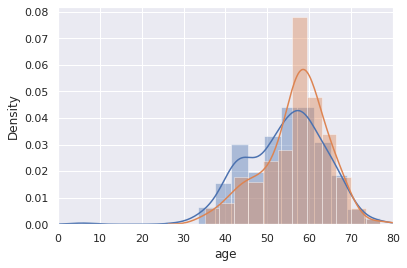

In [ ]:
sns.distplot(df['age'])
sns.distplot(df_chd['age'])
plt.xlim(0,80)

The age distribution is unimodal, with most patients being between 50 and 60. There is no need to normalize/standardize the data since there aren't other variables similar to age in the dataset. (We will use normalization and standardization in further modeling of the data).

However, the distribution slightly shifts to the right when filtering only for patients with CHD, since CHD is normally occurs at later ages for both men and women.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


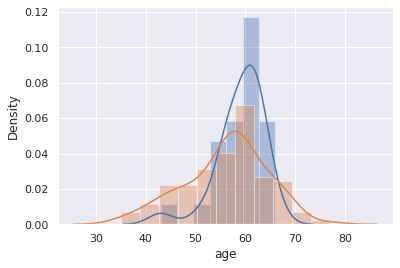

In [ ]:
sns.distplot(df_chd[df_chd['sex'] == 0]['age'])
sns.distplot(df_chd[df_chd['sex'] == 1]['age'])

"In men, this increase usually levels off around the age of 45 to 50 years, whereas in women, the increase continues sharply until the age of 60 to 65 years." [1] We can see through the distribution of age of patients with CHD that men face it earlier than woman.

In [ ]:
df[df['age'] == 5.7]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
250,hdoamedow89nopsut,5.7,1,4,110,201,0,0,126,1,1.5,2,0,6,0


We can see that we have one outlier which is a 5.7 year old male, the patient doesnt have CHD, however the patient faces thalassemia as well as asymptomatic angina. Facing thalassemia and asymptomatic angina at such an early age is unusual, therefore we can consider this data point as an outlier.

We can conclude that the distribution of age in data is distributed correctly. We only need to remove the outlier, since it contains unusual data.

In [ ]:
df_new = df[df['age'] != 5.7]

# sex

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


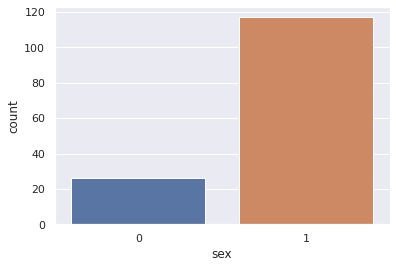

In [ ]:
sns.countplot(df_chd.sex)

There is a clear imbalance in the age. Where the number of male patients with CHD is much higher than females.

"Men generally develop CVD at a younger age and have a higher propensity of developing coronary heart disease (CHD) than women." [2]

Men generally develop coronary heart diseases at a younger age, and have a higher risk of developing CHD which explains the imbalance in the dataset for patients with CHD.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


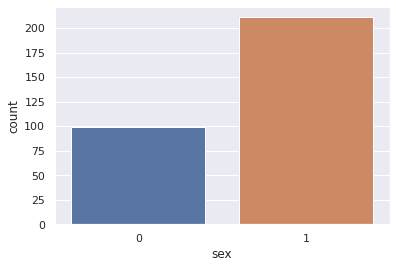

In [ ]:
sns.countplot(df.sex)

However, in general for all people collected in the dataset with all outcomes, there is still an imbalance in the data in terms of data collection. We can solve this issue through over sampling *(we cannot use **under sampling** since we do not have an extensive number of records)* by adding more data points for the females.



In [ ]:
male = df[df['sex'] == 1]
female = df[df['sex'] == 0]
print(male.shape, female.shape)

(211, 15) (99, 15)


In [ ]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ['outcome', 'ID']]
X = df[cols]
Y = df['outcome']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
smp = RandomOverSampler(random_state = 42)
X_new, Y_new = smp.fit_resample(X,Y)
print(X_new.shape, Y_new.shape)

(835, 13) (835,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


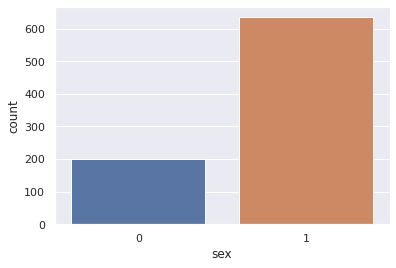

In [ ]:
sns.countplot(X_new['sex'])

Oversampling didnt work initally, will look into it later.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


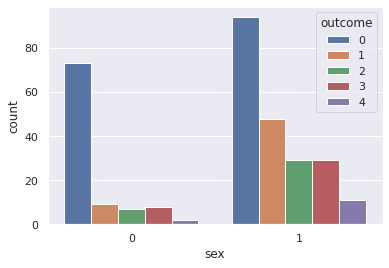

In [ ]:
sns.countplot(df.sex, hue = df.outcome)

By looking at the age in comparison to the outcome, we can further confirm our statement, that men are more likely to develop cardiovascular diseases than women, thus the distribution within each of the sexes is correct.

# cp

Angina ➡ Type of chest pain caused by reduced blood flow to the heart. 
- Value 1: Typical angina ➡ Discomfort that is noted when the heart does not get enough blood or oxygen. Typically, this is caused by blockage or plaque buildup in the coronary arteries. Men commonly have the usual kind of angina as described above. [3]

- Value 2: Atypical angina ➡ Unusual signs that occur in CHD patients such as fatigue, sleep disturbances, shortness of breath, and chest discomfort. This type of Angina is usually more common among women. [3]

- Value 3: Non-anginal pain ➡ Non-cardiac chest pain is the term that is used to describe pain in the chest that is not caused by heart disease or a heart attack.

- Value 4: Asymptomatic ➡ Occurs when the heart temporarily doesn’t receive enough blood (and thus oxygen), but the person with the oxygen-deprivation doesn’t notice any effects. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


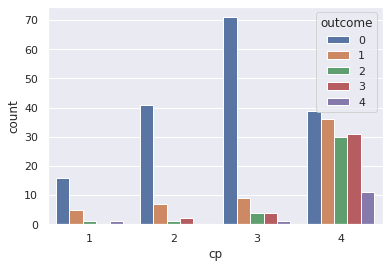

In [ ]:
sns.countplot(df.cp, hue = df.outcome)

We can see that most CHDs come from patients with asymptomatic angina, which are people with hearts that do not receive enough oxygen. There isn't significant imbalancing in this column and the distribution shows enough insights.

# restbps

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


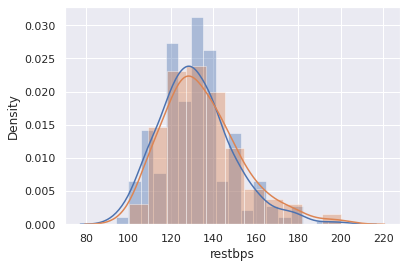

In [ ]:
sns.distplot(df.restbps)
sns.distplot(df_chd.restbps)

We can see that the distribution of the restbps is almost identical for all patients in comparison to patients only with chd, this **might** indicate that the restbps is not a significant factor leading to CHD.

However, sources indicate otherwise "High blood pressure (BP) is one of the most important risk factors for cardiovascular disease (CVD), which is the leading cause of mortality. Approximately 54% of strokes and 47% of coronary heart diseases, worldwide, are attributable to high BP." [4]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


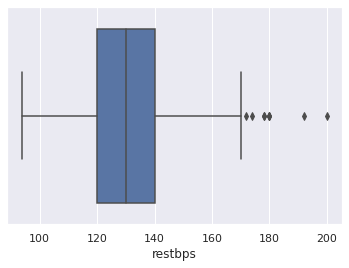

In [ ]:
sns.boxplot(df.restbps)

We can see that there is nothing wrong with the distribution of the data for the resting blood pressure., however there are some outliers.

In [ ]:
df[df['restbps'] > 172]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
83,hdoamedd2x2n6psut,68.0,1,3,180,274,1,2,150,1,1.6,2,0,7,3
126,hdoamedx2n6w7psut,56.0,0,4,200,288,1,2,133,1,4.0,3,2,7,3
172,hdoamed8zhx6fpsut,59.0,0,4,174,249,0,0,143,1,0.0,2,0,3,1
183,hdoamedt87reqpsut,59.0,1,1,178,270,0,2,145,0,4.2,3,0,7,0
188,hdoamed7bg9v1psut,54.0,1,2,192,283,0,2,195,0,0.0,1,1,7,1
201,hdoamedza35zgpsut,64.0,0,4,180,325,0,0,154,1,0.0,1,0,3,0
213,hdoamedmjbpjcpsut,66.0,0,4,178,228,1,0,165,1,1.0,2,2,7,3
231,hdoamedg9v121psut,55.0,0,4,180,327,0,1,117,1,3.4,2,0,3,2


# chol

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

3600


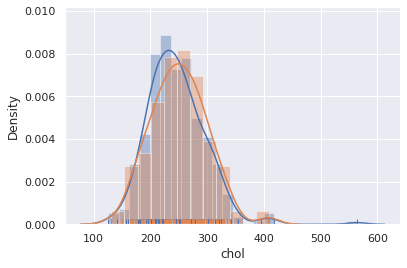

In [ ]:
#Printing the distribution without the outlier
sns.distplot(df[df['chol'] < 1000]['chol'], rug = True)
sns.distplot(df_chd[df_chd['chol'] < 1000]['chol'], rug = True)
print(df['chol'].max())

When omitting data from patients that do not have CHD, we can see that the distribution slightly shifts to the right, showing that patients with CHD, have higher levels of cholesterol. Most of the patients have a cholesterol level of around 230-270, which is considered very high.

We can create three categories:
- < 200: Desirable.
- 200 <= x <= 239: Bordeline high.
- greater than 239: High. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


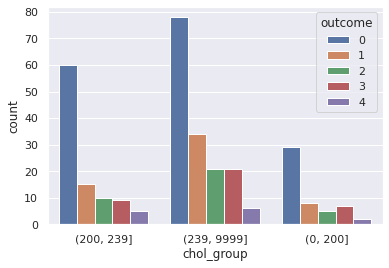

In [ ]:
df['chol_group'] = pd.cut(df['chol'], bins = [0,200,239,9999])
df['chol_group'] = df['chol_group'].astype('str')
df['outcome_new'] = df['outcome'].replace({2:1, 3:1, 4:1})
sns.countplot(df['chol_group'], hue = df['outcome'])

Here we can see that patients with very high cholesterol, the number of people with CHD are more than the number of people without CHD; indicating that cholesterol is a significant factor that impacts CHD.

In [ ]:
df[df['chol'] == 3600]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,chol_group,outcome_new
75,hdoamedv93w6dpsut,65.0,0,3,160,3600,0,2,151,0,0.8,1,0,3,0,"(239, 9999]",0


"Levels of 100 to 129 mg/dL are acceptable for people with no health issues but may be of more concern for those with heart disease or heart disease risk factors. A reading of 130 to 159 mg/dL is borderline high and 160 to 189 mg/dL is high. A reading of 190 mg/dL or higher is considered very high." [5] Therefore, we can conclude that this data point is definetely an outlier and we can remove it from our data, since its not possible for a patient to have a cholesterol level of 3600.

In [ ]:
df_new = df_new[df_new['chol'] != 3600]

# fbs

 "Low fasting glucose was significantly and inversely associated with coronary heart disease." [6] Therefore, we can conclude that there is an inverse relationship between the fasting blood sugar and the outcome. However, this is inevident in the data, as we can see that for patients will low fbs, the number of patients that have CHD is lower than the ones who dont. As opposed to high fbs where theyre equal.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


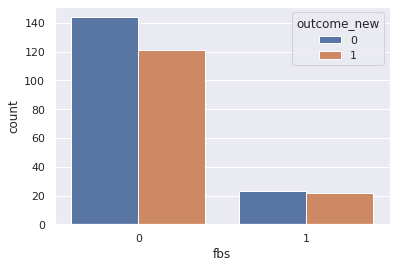

In [ ]:
sns.countplot(df.fbs, hue = df.outcome_new)

Therefore, we can use oversampling to help balance the dataset. So far the imbalancing issue occurs for both **sex** and **fbs** variables. (Ask clients about imbalancing).

# restecg

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


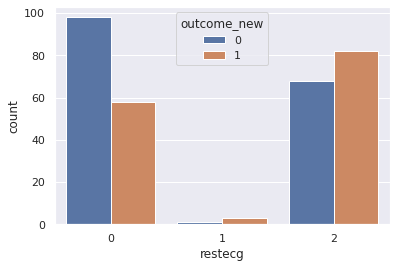

In [ ]:
sns.countplot(df.restecg, hue = df.outcome_new)

The data for restecg is evidently imbalanced, where there isnt enough data collected for patients that have ST-T wave abnormality.

In [ ]:
df[df['restecg'] == 1]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,chol_group,outcome_new
231,hdoamedg9v121psut,55.0,0,4,180,327,0,1,117,1,3.4,2,0,3,2,"(239, 9999]",1
257,hdoamedxpb887psut,76.0,0,3,140,197,0,1,116,0,1.1,2,0,3,0,"(0, 200]",0
282,hdoamedr6pt29psut,55.0,0,4,128,205,0,1,130,1,2.0,2,1,7,3,"(200, 239]",1
285,hdoamed6ows42psut,58.0,1,4,114,318,0,1,140,0,4.4,3,3,6,4,"(239, 9999]",1


Instead of oversampling, we can remove the data with wave abnormality since it can potentially impact our EDA, we can conisder them outliers, since there are only 4 patients out of 310. (Ask client if wave abnormality is a common issue with CHD).

In [ ]:
df_new = df_new[df_new['restecg'] != 1]

# thalack

In [ ]:
data_types = df.dtypes
print(data_types)

ID              object
age            float64
sex              int64
cp               int64
restbps          int64
chol             int64
fbs              int64
restecg          int64
thalack         object
exang            int64
oldpeak        float64
slope            int64
ca              object
thal            object
outcome          int64
chol_group      object
outcome_new      int64
dtype: object


Thalack is identified as an object, since there are multiple data types within the same column, a lot of the values cannot be converted into float values when plotting the distplot.

# exang

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


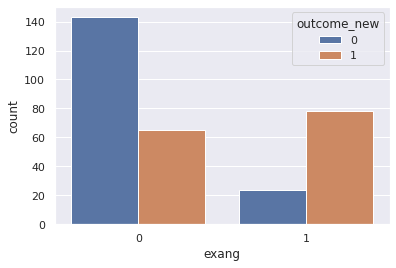

In [ ]:
sns.countplot(df.exang, hue = df.outcome_new)

We can see through the count plot that execersize induced angina has evident impact on CHD, since the number of patients with excersize induced angina has more patients with CHD than vice versa. Additionally, the distribution seems correct.

# oldpeak

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


10.84188376926719


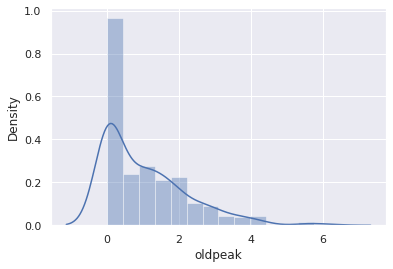

In [ ]:
sns.distplot(df[df['oldpeak'] < 30]['oldpeak'])
print(df['oldpeak'].skew())

However, the distribution of the data seems to be left skewed. With most values being at 0.

In [ ]:
df[df['oldpeak'] > 10]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,chol_group,outcome_new
299,hdoamedn9erxppsut,68.0,1,4,144,193,1,0,141,0,34.0,2,2,7,2,"(0, 200]",1


Ask client what are the range of values for oldpeak, is it possible for a patient to have an oldpeak of 34.0?
If it is not possible for a patient to have an oldpeak of 32 we can conclude that it is an outlier and we can remove this row from the dataset.

# slope

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


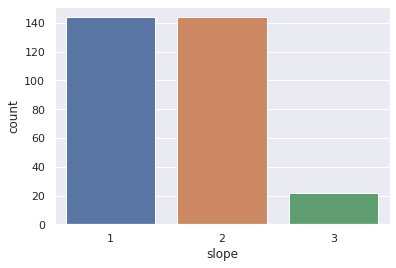

In [ ]:
sns.countplot(df.slope)

# ca

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


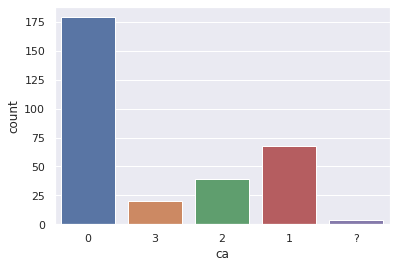

In [ ]:
sns.countplot(df.ca)

# thal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


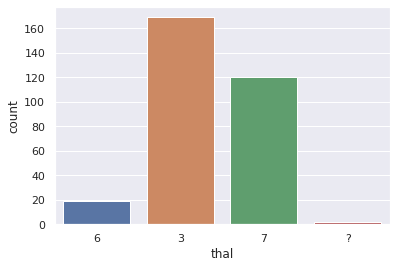

In [ ]:
sns.countplot(df.thal)

In [ ]:
df[df['thal'] == '?']

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,chol_group,outcome_new
87,hdoamed3uds1bpsut,53.0,0,3,128,216,0,2,115,0,0.0,1,0,?,0,"(200, 239]",0
266,hdoamedst0g3npsut,52.0,1,4,128,204,1,0,156,1,1.0,2,0,?,2,"(200, 239]",1


# outcome

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


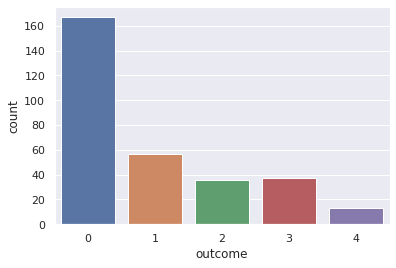

In [ ]:
sns.countplot(df.outcome)

# **Bibliography**

**[1]** P. Jousilahti, E. Vartiainen, J. Tuomilehto, and P. Puska, “Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease,” Circulation, vol. 99, no. 9, pp. 1165–1172, 1999.

**[2]** S. H. Bots, S. A. E. Peters, and M. Woodward, “Sex differences in coronary heart disease and stroke mortality: a global assessment of the effect of ageing between 1980 and 2010,” BMJ Global Health, vol. 2, no. 2, 2017.

**[3]** Harrington HealthCare System. 2021. Typical and Atypical Angina: What to Look For - Harrington HealthCare System. [online] Available at: <https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/> [Accessed 17 November 2021].

**[4]** S. H. Bots, S. A. E. Peters, and M. Woodward, “Sex differences in coronary heart disease and stroke mortality: a global assessment of the effect of ageing between 1980 and 2010,” BMJ Global Health, vol. 2, no. 2, 2017.

**[5]** “Cholesterol levels by age: Differences and recommendations,” Medical News Today. [Online]. Available: https://www.medicalnewstoday.com/articles/315900#recommended-levels. [Accessed: 18-Nov-2021].

**[6]** Metabolism, “The effect of fasting glucose levels on cardiovascular disease and all-cause mortality,” PracticeUpdate. [Online]. Available: https://www.practiceupdate.com/content/the-effect-of-fasting-glucose-levels-on-cardiovascular-disease-and-all-cause-mortality/52616#:~:text=Impaired%20and%20diabetic%20fasting%20glucose,%2C%20and%20all%2Dcause%20mortality. [Accessed: 18-Nov-2021]. 